In [775]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Combine original and synthetic datasets**

In [776]:
import os

combined_dataset_path = '../../datasets/Salman/combined_dataset.csv'

if os.path.exists(combined_dataset_path):
    print("Combined dataset already exists. Loading it...")
    df = pd.read_csv(combined_dataset_path)
else:
    print("Combined dataset not found. Creating it...")
    # Read both Kaggle and synthetic datasets
    # Kaggle dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data
    original_df = pd.read_csv('../../datasets/Salman/Salman.csv')
    synthetic_df = pd.read_csv('../../datasets/Salman/synthetic_data.csv')

    # Combine them
    df = pd.concat([original_df, synthetic_df], ignore_index=True)

    # Shuffle the combined dataset
    # frac=1 means shuffle 100% of the rows
    # random_state=42 ensures reproducible shuffling (i.e 'shuffling' will give the same result every time)
    # reset_index(drop=True) resets the row indices after shuffling
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Save combined dataset
    df.to_csv(combined_dataset_path, index=False)
    print("Combined dataset created and saved.")

Combined dataset already exists. Loading it...


## **Exploratory Data Analysis**

In [777]:
print("Columns:", df.columns.tolist())

Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [778]:
# print(df)

In [779]:

# I just want to see what the output of a single column is
# print(df["Family_Income"])


# The output of this is a **Pandas Series**, which is similar to a one-dimensional array, but with labeled indices and additional capabilities specific to data analysis. Let’s break down the key parts of the output:

# - **Index** (leftmost part, like `0`, `1`, `2`): This is the row index within the DataFrame.
# - **Values** (e.g., "Low," "Medium," "High"): These are the actual values in the column.
# - **Name** (`Family_Income`): The name of the column you accessed.
# - **Length and dtype**: The number of rows (`6607`) and data type (`object` in this case, meaning it’s text data).

# You can think of a Pandas Series as a hybrid between a list (for sequential data storage) and a dictionary (because each value has an associated label or index).
# When you extract a single column from a DataFrame like `df["Family_Income"]`, it’s returned as a Series, which allows you to perform operations on it directly, just as you would with a NumPy array or list but with additional data analysis functions specific to Pandas.


In [780]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,70,High,Medium,No,5,85,High,Yes,1,High,Medium,Public,Positive,3,No,Postgraduate,Near,Female,66
1,16,83,Medium,High,Yes,9,95,Medium,Yes,2,Low,High,Public,Neutral,2,No,College,Near,Male,69
2,49,40,Medium,Medium,No,9,0,Low,Yes,3,High,High,Public,Positive,13,Yes,College,Moderate,Male,45
3,17,68,Medium,Medium,Yes,10,57,Medium,Yes,1,High,Medium,Private,Positive,1,Yes,High School,Moderate,Female,62
4,20,80,High,Medium,No,3,60,Low,Yes,3,Medium,Low,Private,Positive,5,No,College,Far,Female,74


In [781]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [782]:
df.describe()  # Summary statistics for NUMERICAL features

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,13207.000000,13207.000000,13207.000000,13207.000000,13207.000000,13207.000000,13207.000000
mean,26.690770,74.888014,6.956993,69.877338,4.929507,6.028318,70.371697
std,14.983754,19.457661,2.118044,20.811766,6.609573,8.266166,14.306801
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,17.000000,67.000000,6.000000,58.000000,1.000000,2.000000,65.000000
50%,23.000000,78.000000,7.000000,72.000000,2.000000,3.000000,69.000000
75%,33.000000,89.000000,8.000000,86.000000,6.000000,5.000000,79.000000
max,80.000000,100.000000,12.000000,100.000000,30.000000,40.000000,101.000000


In [783]:
print("Shape before encoding:", df.shape)

Shape before encoding: (13207, 20)


### **Drop rows where exam score is greater than 100** (There's only 1 row apparently)

In [784]:
# First check how many rows will be dropped
print(f"Rows with Exam_Score > 100: {len(df[df['Exam_Score'] > 100])}")

# Drop the rows
df.drop(df[df["Exam_Score"]>100].index, inplace=True)

# Verify the drop
print(f"Max Exam_Score after dropping: {df['Exam_Score'].max()}")
print(f"New dataset size: {len(df)}")

Rows with Exam_Score > 100: 1
Max Exam_Score after dropping: 100
New dataset size: 13206


**How df[df["Exam_Score"]>100] works**

1. Inner operation: `df["Exam_Score"] > 100`
- Creates a boolean Series
- True for rows where Exam_Score > 100
- False for all other rows
```python
# Example output of df["Exam_Score"] > 100:
0    False    # row 0: score ≤ 100
1    False    # row 1: score ≤ 100
2    True     # row 2: score > 100
3    False    # row 3: score ≤ 100
...
```

2. Outer operation: `df[boolean_series]`
- df[] can take a boolean Series as input
- Returns only rows where the boolean Series is True
- Kind of like filtering rows

**Why removing this single outlier significantly improved the model's performance**

This significant improvement (from R² = 0.77 to 0.825) after removing just one row with score 101 suggests that this point was likely an outlier that was affecting my model's performance. Here's why:

1. Linear Regression Sensitivity:
- Linear regression is sensitive to outliers
- The model tries to minimize squared errors
- Outliers can "pull" the regression line to try to accommodate them
- Removing outliers often improves linear model fit

2. The Score of 101:
- If most scores are ≤ 100
- And one point is at 101
- This point breaks the natural boundary of the scoring system
- Model was trying to account for this unusual point

Visual analogy:
- Imagine a rubber sheet (your model)
- Most points are within a certain range
- One point is pulling the sheet beyond its natural boundary
- Removing that point lets the sheet settle into a better fit

This improvement suggests:
1. The 101 score was likely a data error
2. The decision to remove it was justified
3. The model is now better aligned with the true patterns in the data

### **Handling Missing Values** (in **categorical** features since those are the only features with missing data)

In [785]:
# List of binary (2) category features
binary_features = [
    "Extracurricular_Activities",
    "Internet_Access",
    "School_Type",
    "Learning_Disabilities",
    "Gender"
]

# List of multi-category (more than 2) features
multi_cat_features = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Motivation_Level",
    "Family_Income",
    "Teacher_Quality",
    "Peer_Influence",
    "Distance_from_Home",
    "Parental_Education_Level"
]

# Check missing values in all categorical features
missing_values = df[binary_features + multi_cat_features].isnull().sum()

print(f"Missing values in each feature: \n")
print(missing_values[missing_values > 0])  # Only show features with missing values

Missing values in each feature: 

Teacher_Quality             78
Distance_from_Home          67
Parental_Education_Level    90
dtype: int64


In [786]:
# BINARY CATEGORICAL FEATURES
# Fill with mode (most frequent value)
for feature in binary_features:
    mode_value = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode_value)
    print(f"Filled {feature} missing values with mode: {mode_value}")

Filled Extracurricular_Activities missing values with mode: Yes
Filled Internet_Access missing values with mode: Yes
Filled School_Type missing values with mode: Public
Filled Learning_Disabilities missing values with mode: No
Filled Gender missing values with mode: Male


In [787]:
# MULTI-CATEGORY FEATURES
# Fill with mode (most frequent value)
for feature in multi_cat_features:
    mode_value = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode_value)
    print(f"Filled {feature} missing values with mode: {mode_value}")

Filled Parental_Involvement missing values with mode: Medium
Filled Access_to_Resources missing values with mode: Medium
Filled Motivation_Level missing values with mode: Medium
Filled Family_Income missing values with mode: Low
Filled Teacher_Quality missing values with mode: Medium
Filled Peer_Influence missing values with mode: Positive
Filled Distance_from_Home missing values with mode: Near
Filled Parental_Education_Level missing values with mode: College


### **Separate numerical and categorical features/columns**

In [788]:
numerical_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Physical_Activity',
                     'Tutoring_Sessions']

categorical_features = binary_features + multi_cat_features

## **Plotting functions**

In [789]:

def plot_numerical_features(df, numerical_features):
    n_features = len(numerical_features)
    n_rows = (n_features + 2) // 3  # 3 plots per row
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    axes = axes.ravel()
    
    for idx, feature in enumerate(numerical_features):
        sns.scatterplot(data=df, x=feature, y='Exam_Score', ax=axes[idx])
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Exam Score')
        axes[idx].set_title(f'{feature} vs Exam Score')
    
    # Hide empty subplots if any
    for idx in range(len(numerical_features), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


def plot_correlation_heatmap(df, numerical_features):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()


def plot_categorical_features(df, categorical_features):
    n_features = len(categorical_features)
    n_rows = (n_features + 1) // 2  # 2 plots per row
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
    axes = axes.ravel()
    
    for idx, feature in enumerate(categorical_features):
        sns.boxplot(data=df, x=feature, y='Exam_Score', ax=axes[idx])
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Exam Score')
        axes[idx].set_title(f'Exam Score by {feature}')
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots if any
    for idx in range(len(categorical_features), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


## **Visualizations for Numerical Features**

Plotting numerical features...


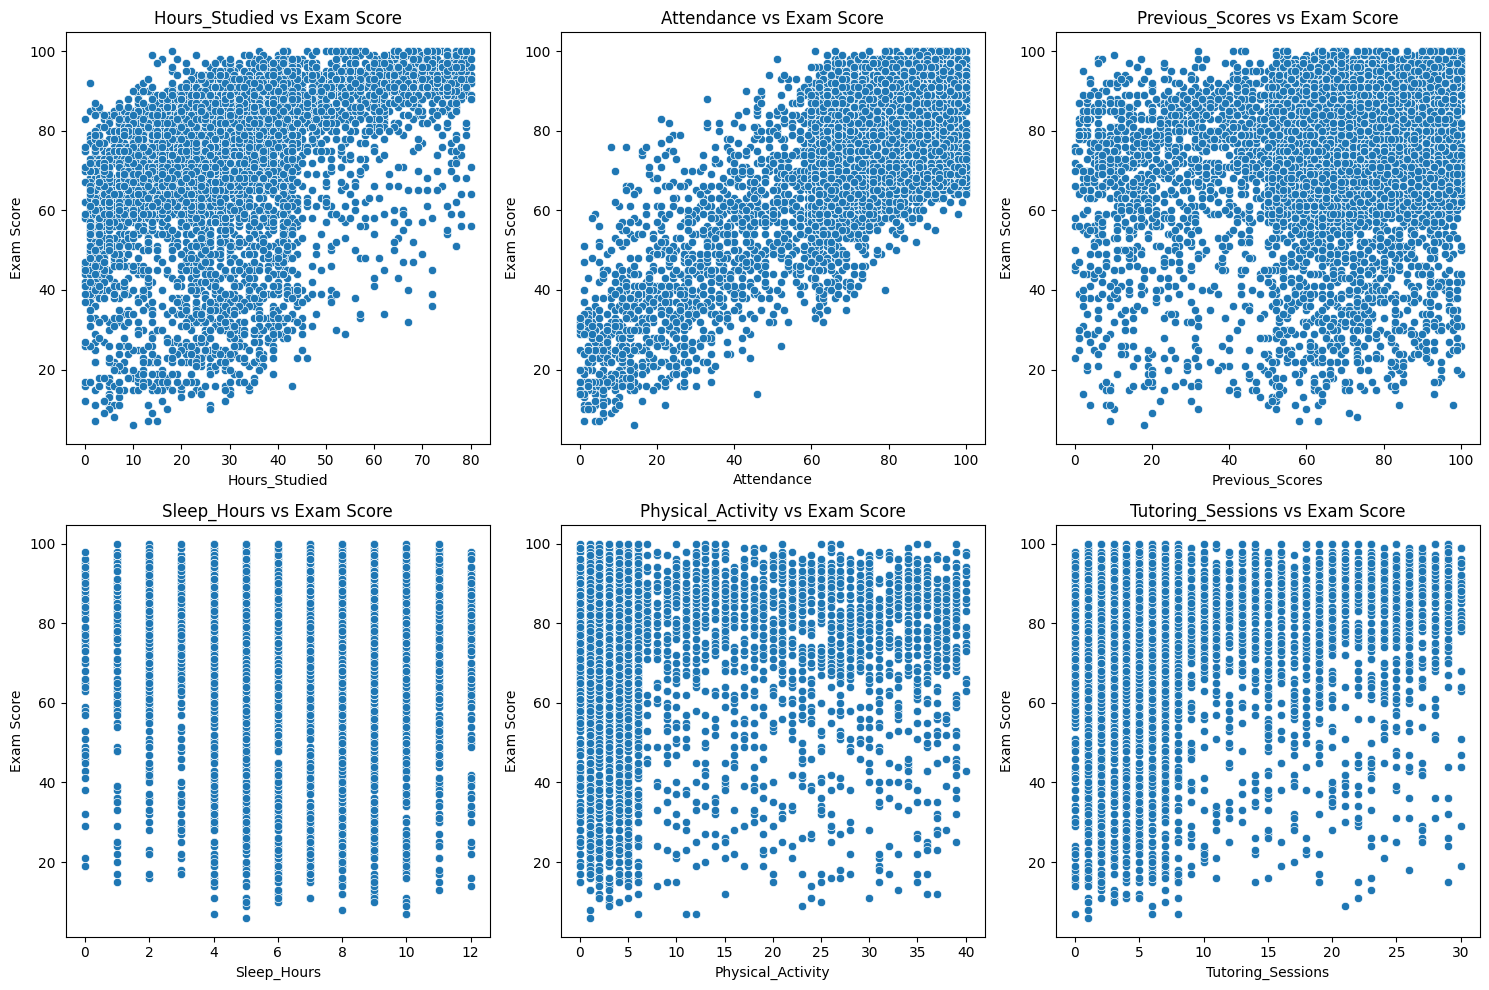

In [790]:
# Create visualizations
print("Plotting numerical features...")
plot_numerical_features(df, numerical_features)


Plotting correlation heatmap for numerical features...


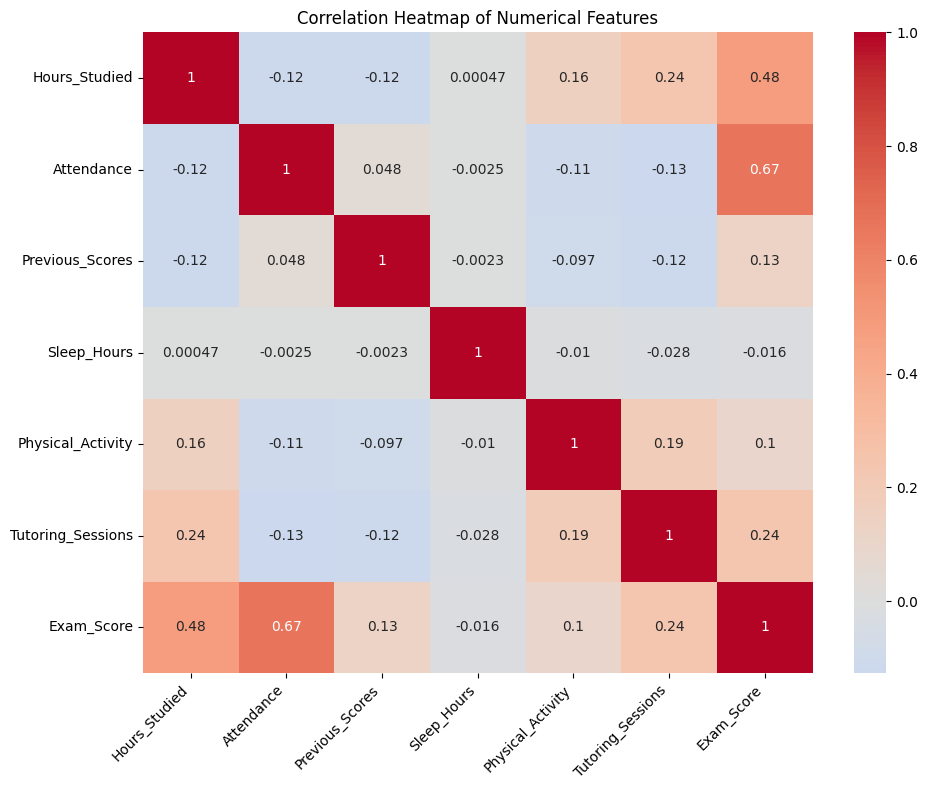

In [791]:
print("\nPlotting correlation heatmap for numerical features...")
plot_correlation_heatmap(df, numerical_features + ['Exam_Score'])

## **Visualizations for Categorical Features**


Plotting categorical features...


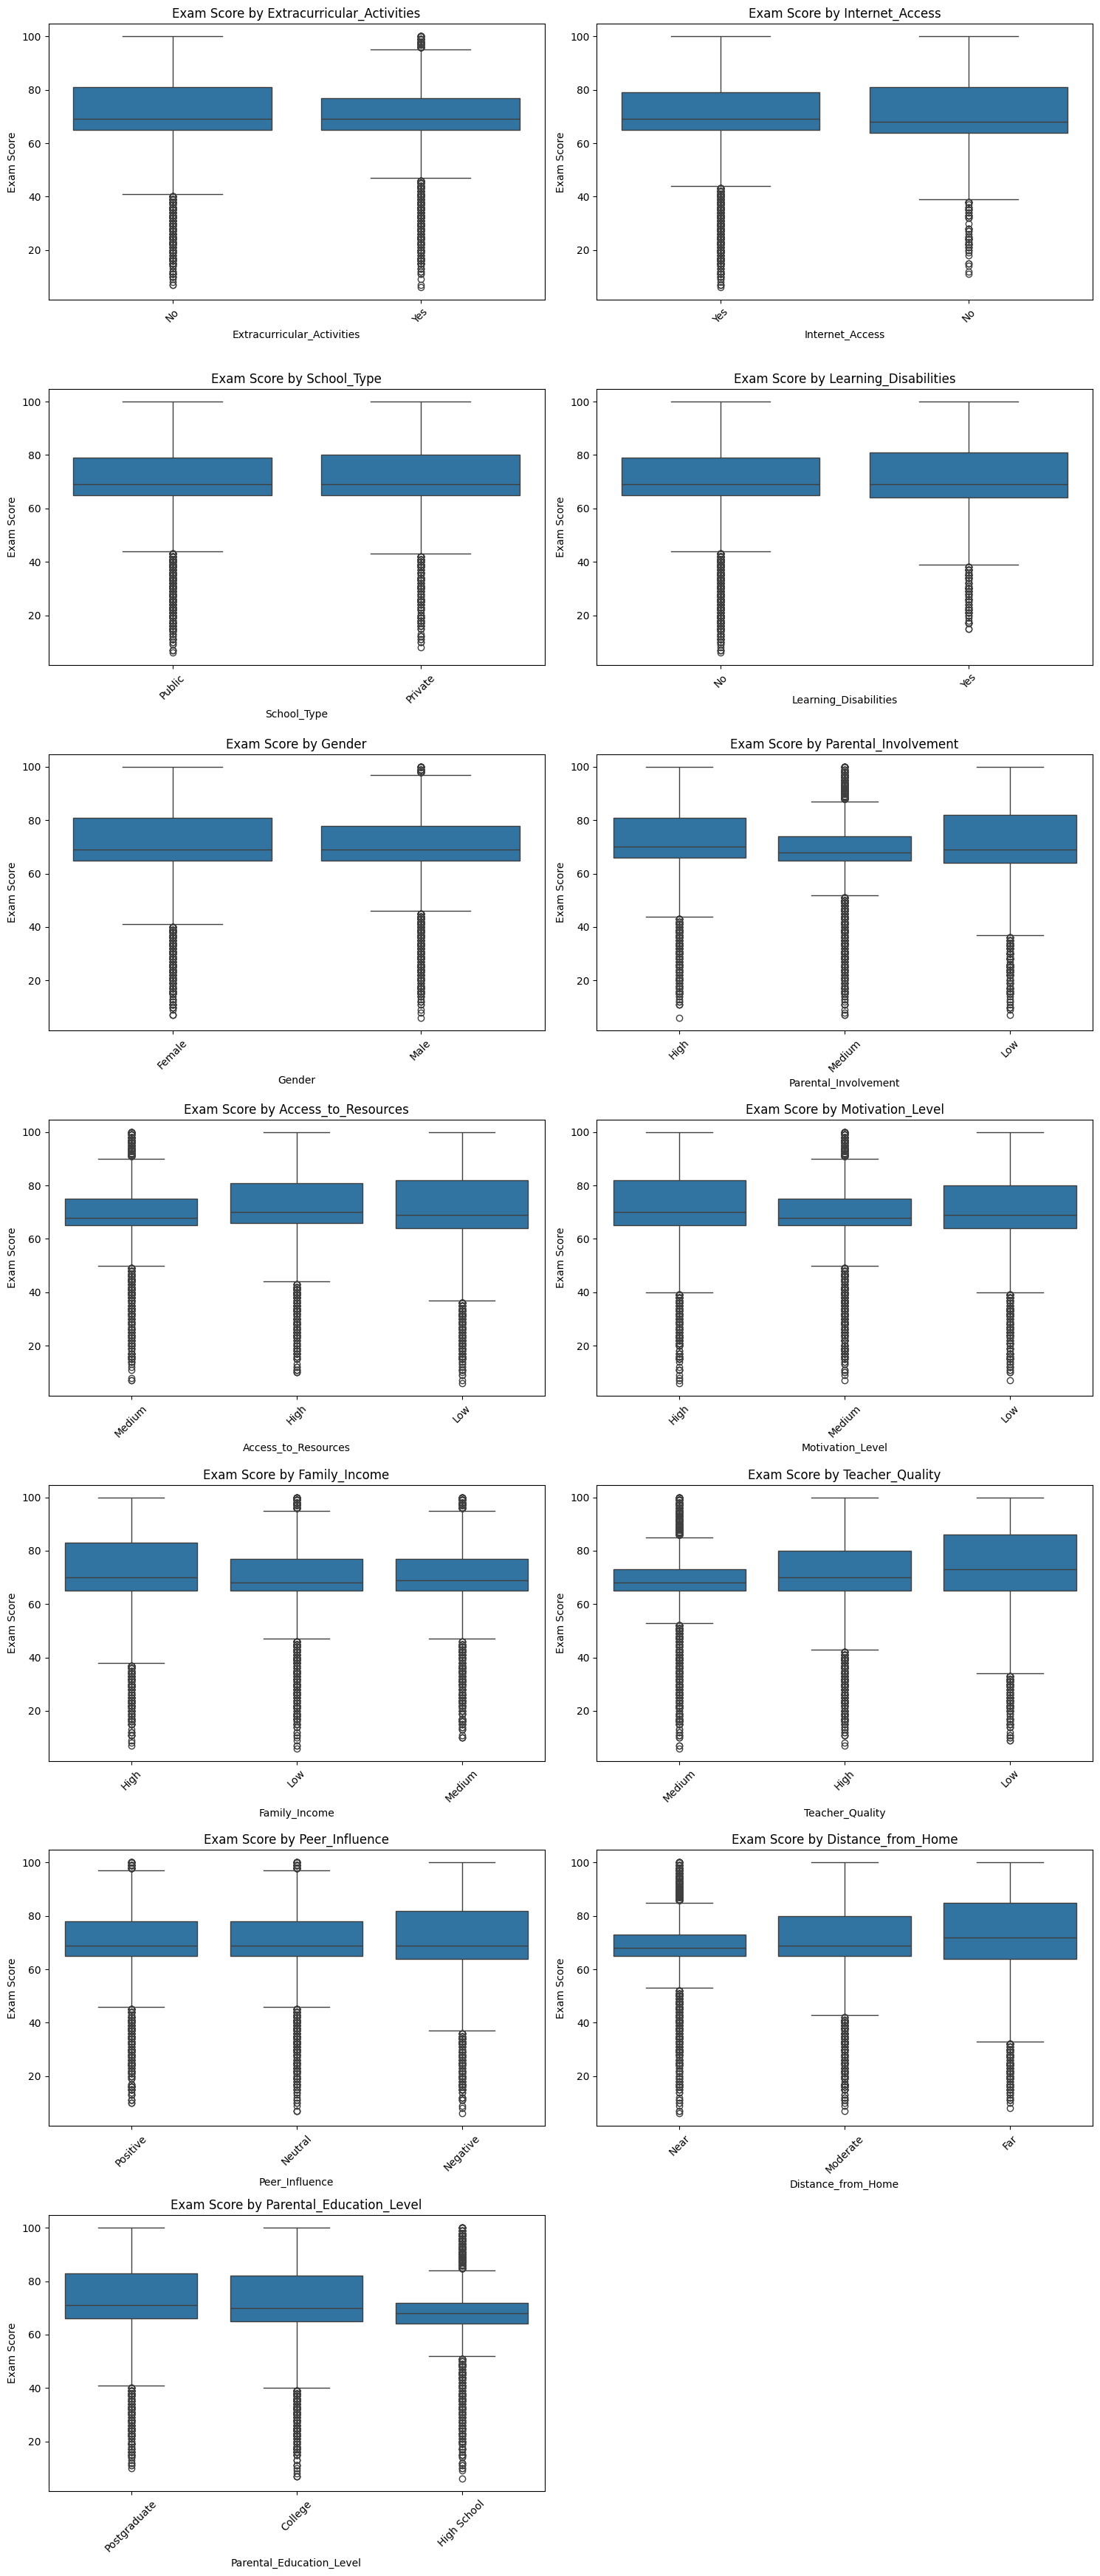

In [792]:
print("\nPlotting categorical features...")
plot_categorical_features(df, categorical_features)

### How to interpret the above boxplots (we'll use 'Exam Scores by Parental_Involvement' as an example) **(OLD)**:

Key Components of a Boxplot:
1. The (blue) Box:
- The middle line in each box is the median exam score
- The bottom of the box is the 25th percentile (Q1)
- The top of the box is the 75th percentile (Q3)
- The box itself contains the middle 50% of the scores

2. The Whiskers:
- Extend to show the rest of the distribution
- The lines above and below the box show the spread of the remaining data
- Usually extend to 1.5 times the box height (IQR)

3. The Dots/Circles:
- Individual points above/below the whiskers are outliers
- These represent unusually high or low scores


Interpreting Parental_Involvement Plot:
1. Central Tendency:
- High parental involvement shows slightly higher median scores
- There's a small upward trend from Low → Medium → High involvement

2. Spread:
- All three categories have similar box sizes, suggesting similar variability
- High involvement category seems to have a slightly tighter distribution (smaller box)

3. Outliers:
- All categories have some high-scoring outliers (dots above the whiskers)
- There seem to be more high-scoring outliers in the "High" involvement category

4. Overall Pattern:
- There's a slight positive relationship between parental involvement and exam scores
- The difference isn't dramatic, but it's visible
- Students with high parental involvement tend to score marginally better

For linear regression model:
- This categorical feature shows some relationship with exam scores
- You should definitely keep this feature
- You'll need to encode it properly (e.g., one-hot encoding) for your linear regression

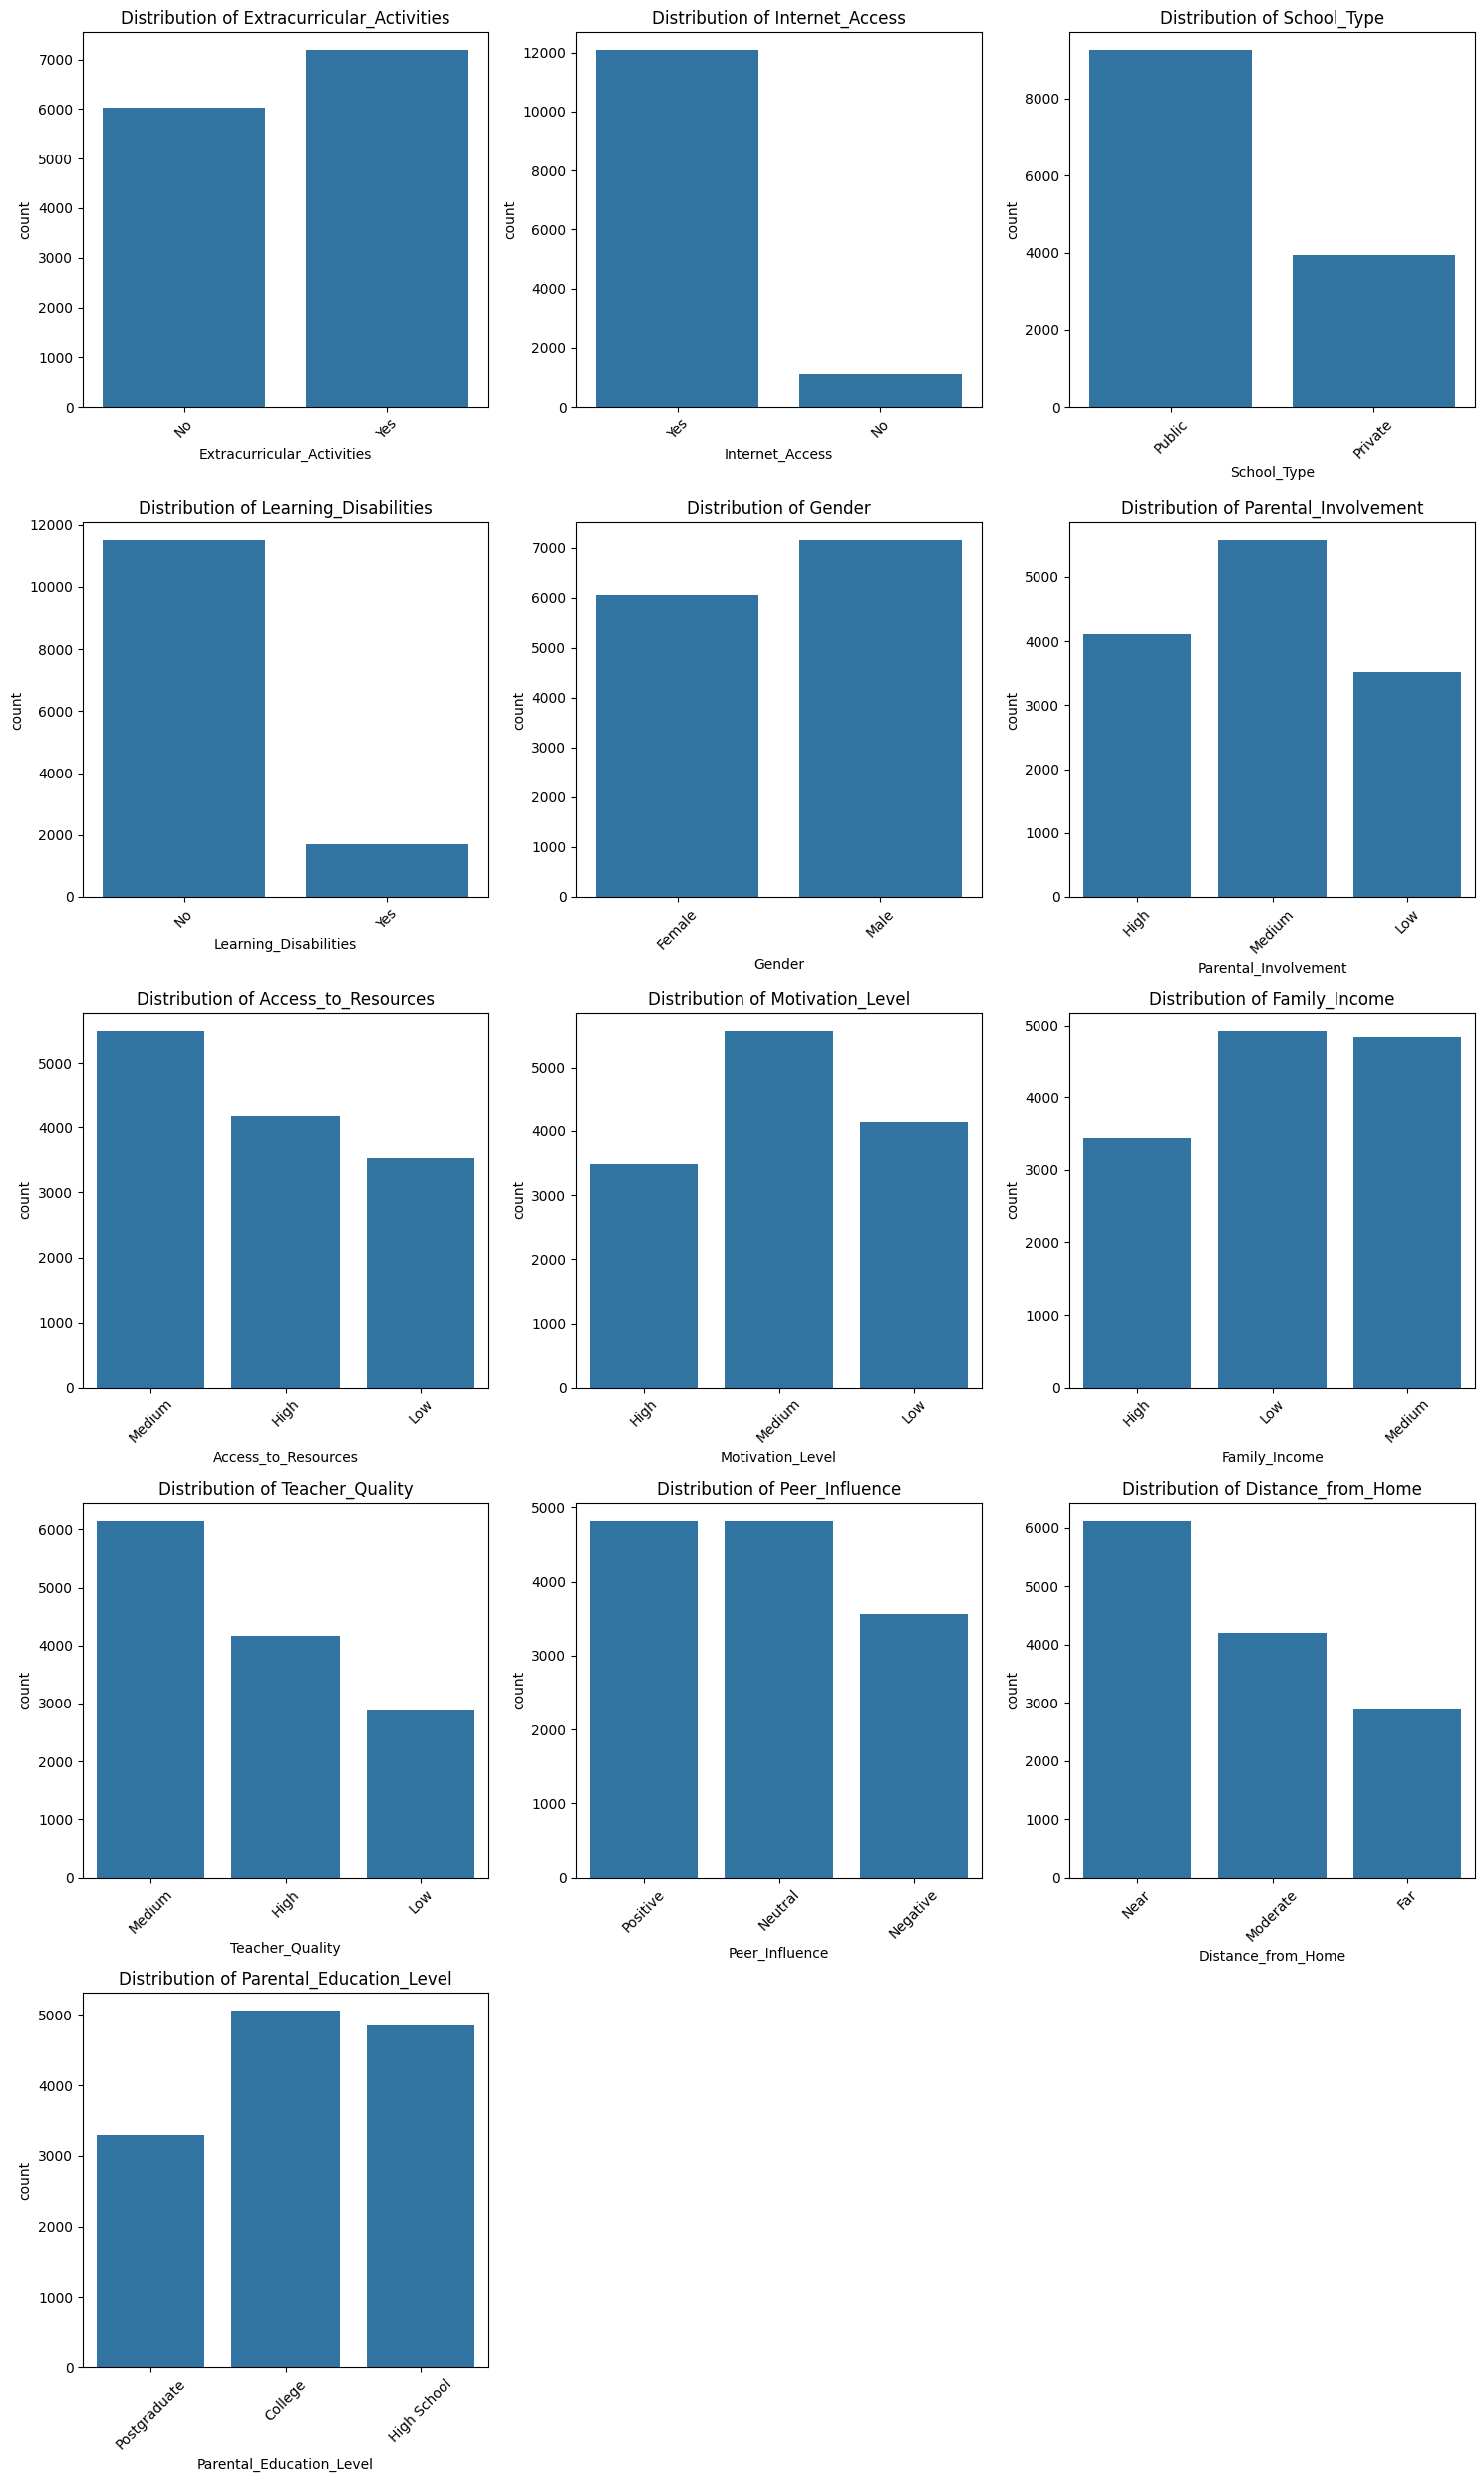

In [793]:
# Additional visualization: Count plots for categorical variables

# Calculate required grid dimensions
n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # ceiling division

plt.figure(figsize=(15, 5*n_rows))  # adjust figure size based on rows
for idx, feature in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, idx+1)
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [794]:
# Print value counts for categorical features

print("Value Counts for Categorical Features:\n")
for feature in categorical_features:
    print(f"{df[feature].value_counts()}\n")

Value Counts for Categorical Features:

Extracurricular_Activities
Yes    7187
No     6019
Name: count, dtype: int64

Internet_Access
Yes    12085
No      1121
Name: count, dtype: int64

School_Type
Public     9258
Private    3948
Name: count, dtype: int64

Learning_Disabilities
No     11508
Yes     1698
Name: count, dtype: int64

Gender
Male      7154
Female    6052
Name: count, dtype: int64

Parental_Involvement
Medium    5576
High      4109
Low       3521
Name: count, dtype: int64

Access_to_Resources
Medium    5498
High      4180
Low       3528
Name: count, dtype: int64

Motivation_Level
Medium    5576
Low       4138
High      3492
Name: count, dtype: int64

Family_Income
Low       4928
Medium    4836
High      3442
Name: count, dtype: int64

Teacher_Quality
Medium    6153
High      4173
Low       2880
Name: count, dtype: int64

Peer_Influence
Positive    4824
Neutral     4820
Negative    3562
Name: count, dtype: int64

Distance_from_Home
Near        6125
Moderate    4198
Far      

## **Dropping Weak Features**

In [795]:
# List of columns to drop

# Numerical Features: "Sleep_Hours", "Physical_Activity"
# Binary Features: "School_Type", "Internet_Access", "Gender"
# Multi-Categorical Features: "Distance_from_Home", "Peer_Influence", "Motivation_Level"

# ALL: "Sleep_Hours", "Physical_Activity", "School_Type", "Internet_Access", "Gender", "Distance_from_Home", "Peer_Influence", "Motivation_Level"
columns_to_drop = [
    "Sleep_Hours", "School_Type"
]

# Dropping the columns
df = df.drop(columns=columns_to_drop)

# Remove the dropped columns from the feature lists
numerical_features = [f for f in numerical_features if f not in ["Sleep_Hours"]]
binary_features = [f for f in binary_features if f not in ["School_Type"]]
# multi_cat_features.remove('Access_to_Resources')

In [796]:
# Displaying the remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


## **Encoding Categorical Features**

In [797]:
# # Encoding binary categorical features

# # Dictionary of binary categorical features and their mappings
# binary_mappings = {}

# # Create mappings dynamically for each binary feature
# for feature in binary_features:
#     unique_values = list(df[feature].unique())
#     # Create mapping with first unique value as 0, second as 1
#     binary_mappings[feature] = {unique_values[0]: 0, unique_values[1]: 1}

# # Apply mappings
# for feature, mapping in binary_mappings.items():
#     df[feature] = df[feature].map(mapping)

# # Optional: Verify the encoding worked
# print("Verify mappings:")
# for feature, mapping in binary_mappings.items():
#     print(f"{feature}: {mapping}")

In [798]:
# # One-hot encode multi-level categorical features (creates separate columns for Low/Medium/High, or Male/Female, or others with more than 2 categories)

# # Create dummy variables for all features at once
# df = pd.get_dummies(df, columns=multi_cat_features, drop_first=True)
# print(df.columns)
# df.head(10)

In [799]:
# print("Shape after encoding:", df.shape)

## **TOP 10 MOST CORRELATED FEATURES TO 'Exam_Score'**

In [800]:
# # Select features with highest correlation to Exam_Score
# correlations = df.corr()['Exam_Score'].abs()
# top_features =  correlations.nlargest(10).index.tolist()

# plt.figure(figsize=(12, 8))

# sns.heatmap(df[top_features].corr(), 
#             annot=True, 
#             cmap='coolwarm',
#             center=0)

# plt.title('Top 10 Correlated Features')
# plt.show()

## **TESTING FEATURE ENGINEERING 1: Study_Effectiveness** *(Before outlier and weak features removed)* **(OLD)**

In [801]:
# # First create the new feature
# df['Study_Effectiveness'] = df['Hours_Studied'] * df['Attendance']

# # Create different feature sets
# def create_feature_versions():
#     original_features = [col for col in df.columns.tolist() if col not in ['Study_Effectiveness', 'Exam_Score']]
    
#     # All original features + new feature
#     features_v1 = original_features + ['Study_Effectiveness']
    
#     # Without Hours_Studied and Attendance, but with Study_Effectiveness
#     features_v2 = [f for f in original_features 
#                    if f not in ['Hours_Studied', 'Attendance']] + ['Study_Effectiveness']
    
#     # Original features only
#     features_v3 = original_features

#     return {
#         'all_features': features_v1,
#         'new_feature_only': features_v2,
#         'originals_only': features_v3
#     }

# # Function to evaluate model
# def evaluate_features(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42
#     )
    
#     # Scale numerical features (don't forget this step!)
#     scaler = MinMaxScaler()
#     numerical_cols = [col for col in X.columns if col in numerical_features + ['Study_Life_Balance', 'Study_Effectiveness']]
#     X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
#     X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
    
#     # Train and evaluate
#     model = LinearRegression()
#     model.fit(X_train, y_train)
    
#     # Get predictions
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
    
#     # Calculate metrics
#     results = {
#         'train_r2': r2_score(y_train, y_pred_train),
#         'test_r2': r2_score(y_test, y_pred_test),
#         'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
#         'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test))
#     }
    
#     return results

In [802]:
# # Compare all versions
# feature_versions = create_feature_versions()
# results = {}

# for version_name, features in feature_versions.items():
#     X = df[features]
#     y = df['Exam_Score']
#     results[version_name] = evaluate_features(X, y)

# # Print results in a readable format
# for version, metrics in results.items():
#     print(f"\nResults for {version}:")
    
#     print(f"Training R²: {metrics['train_r2']:.4f}")
#     print(f"Testing R²: {metrics['test_r2']:.4f}\n")

#     print(f"Training RMSE: {metrics['train_rmse']:.4f}")
#     print(f"Testing RMSE: {metrics['test_rmse']:.4f}")

### **Observation of Study_Effectiveness 1 feature**

1. The combined feature (Study_Effectiveness) alone performs worse than individual features, suggesting:
   - Hours_Studied and Attendance work better as separate features
   - Their individual effects are more important than their interaction

2. Adding Study_Effectiveness to original features barely improves performance:
   - Improvement is less than 0.1%
   - Not worth the added complexity
   - Model can likely capture the relationship between Hours_Studied and Attendance without explicit multiplication

Recommendation:
- Stick with original features (simpler model, virtually same performance)
- The interaction between Hours_Studied and Attendance isn't as meaningful as their individual effects
- Not worth keeping Study_Effectiveness as a feature

## **Getting ready for model training & testing**

In [803]:
# Define the features (X) and target (y)

X = df.drop('Exam_Score', axis=1) # All columns except 'Exam_Score' are features
y = df['Exam_Score']  # 'Exam_Score' is the target

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures included:", X.columns.tolist())

Features shape: (13206, 17)
Target shape: (13206,)

Features included: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


### **Applying PCA to visualize relationship between features and target**

In [804]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Apply PCA
# pca = PCA(n_components=2)  # Reduce to 2 dimensions
# X_pca = pca.fit_transform(X_scaled)

# # Plot
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.show()

#### This PCA (Principal Component Analysis) plot shows the data reduced to 2 dimensions, and there are several things we can observe: **(OLD)**

1. Data Distribution:
- Points are spread out without clear clusters
- There's a relatively continuous distribution
- No strong separation between groups
- Some outliers visible at the edges

2. Pattern:
- The spread appears somewhat random/uniform
- No clear linear or non-linear pattern
- Suggests complex relationships between features
- Shows high variability in the data

3. What This Means for Modeling:
- The lack of clear clusters or patterns suggests that:
  - Linear regression might be too simple
  - You might benefit from more complex models (Random Forest, etc.)
  - The relationships in your data are not straightforward
  - Multiple features are likely important for predictions

4. Outliers:
- Some points are far from the main cluster
- Yellow dots appear to be outliers
- Might want to investigate these cases

In [805]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Data Normalization**

In [806]:
# # Create scaler
# scaler = MinMaxScaler()

# # Scale only numerical features (leave encoded categorical features as is)
# X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# # Verification
# print("Scaled feature ranges:\n")
# for feature in numerical_features:
#     print(f"{feature}: {X_train[feature].min():.2f} to {X_train[feature].max():.2f}")

## **Attempting Polynomial Regression**

In [807]:
# from sklearn.preprocessing import PolynomialFeatures

# def test_polynomial_regression(X_train, X_test, y_train, y_test, degree):
#     # Create polynomial features
#     poly = PolynomialFeatures(degree=degree)
#     X_train_poly = poly.fit_transform(X_train)
#     X_test_poly = poly.transform(X_test)
    
#     # Train model
#     model = LinearRegression()
#     model.fit(X_train_poly, y_train)
    
#     # Get scores
#     train_r2 = model.score(X_train_poly, y_train)
#     test_r2 = model.score(X_test_poly, y_test)
    
#     # Get predictions for RMSE
#     y_pred_train = model.predict(X_train_poly)
#     y_pred_test = model.predict(X_test_poly)
    
#     # Calculate RMSE
#     train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
#     return train_r2, test_r2, train_rmse, test_rmse

In [808]:
# # Test different polynomial degrees
# for degree in [1, 2, 3]:  # degree 1 is linear regression
#     train_r2, test_r2, train_rmse, test_rmse = test_polynomial_regression(
#         X_train, X_test, y_train, y_test, degree
#     )
    
#     print(f"\nDegree {degree} Results:")
#     print(f"Training R²: {train_r2:.4f}")
#     print(f"Testing R²: {test_r2:.4f}")
#     print(f"Training RMSE: {train_rmse:.4f}")
#     print(f"Testing RMSE: {test_rmse:.4f}")

## **Attempting different models** *(No hyperparameter tuning)*

In [809]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge, Lasso

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.compose import ColumnTransformer

# # Define our feature types 
# # numerical_features is already defined from earlier ; categorical_features now includes the one-hot encoded features
# categorical_features = [col for col in X.columns if col not in numerical_features]


# # Create different preprocessing pipelines
# # For linear models (Linear Regression, Ridge, Lasso)
# linear_preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', MinMaxScaler(), numerical_features),
#         ('cat', 'passthrough', categorical_features)
#     ])

# # For SVR
# svr_preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', 'passthrough', categorical_features)
#     ])

# # For tree-based models (no scaling needed)
# tree_preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', numerical_features),
#         ('cat', 'passthrough', categorical_features)
#     ])



# # Define models with their preprocessors
# models = {
#     'Linear Regression': Pipeline([
#         ('preprocessor', linear_preprocessor),
#         ('regressor', LinearRegression())
#     ]),
    
#     'SVR': Pipeline([
#         ('preprocessor', svr_preprocessor),
#         ('regressor', SVR(kernel='rbf'))
#     ]),
    
#     'Decision Tree': Pipeline([
#         ('preprocessor', tree_preprocessor),
#         ('regressor', DecisionTreeRegressor(random_state=42))
#     ]),
    
#     'Random Forest': Pipeline([
#         ('preprocessor', tree_preprocessor),
#         ('regressor', RandomForestRegressor(random_state=42))
#     ]),
    
#     'Gradient Boosting': Pipeline([
#         ('preprocessor', tree_preprocessor),
#         ('regressor', GradientBoostingRegressor(random_state=42))
#     ]),

#     'XGBoost': Pipeline([
#         ('preprocessor', tree_preprocessor),
#         ('regressor', XGBRegressor(random_state=42))
#     ]),
    
#     'Ridge': Pipeline([
#         ('preprocessor', linear_preprocessor),
#         ('regressor', Ridge(alpha=1.0))
#     ]),
    
#     'Lasso': Pipeline([
#         ('preprocessor', linear_preprocessor),
#         ('regressor', Lasso(alpha=1.0))
#     ])
# }

In [810]:
# # Train and evaluate each model
# for name, pipeline in models.items():
#     # Fit model
#     pipeline.fit(X_train, y_train)
    
#     # Get predictions
#     y_pred_train = pipeline.predict(X_train)
#     y_pred_test = pipeline.predict(X_test)
    
#     # Calculate metrics
#     train_r2 = r2_score(y_train, y_pred_train)
#     test_r2 = r2_score(y_test, y_pred_test)
#     train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    
#     print(f"\n{name} Results:")

#     print(f"Training R²: {train_r2:.4f}")
#     print(f"Testing R²: {test_r2:.4f}")

#     print(f"Training RMSE: {train_rmse:.4f}")
#     print(f"Testing RMSE: {test_rmse:.4f}")

#### **Let's analyze the results (Case 9 results): (OLD)**

**Best Performing Models:**
- Linear Regression:
   - Test R² = 0.825
   - Best overall performance
   - Good balance between train/test scores
   - Lowest (i.e. best) test RMSE (1.52)

- Ridge:
   - Almost identical to Linear Regression
   - Shows regularization wasn't needed
   - Very stable performance

- SVR:
   - Similar to Linear/Ridge (Test R² = 0.818)
   - Slightly higher RMSE (higher = worse) but still good
   - Suggests linear relationships are sufficient

<br/>

**Moderate Performance:**
- Gradient Boosting:
   - Decent performance overall
   - Less overfitting than other tree-based models
   - Training (0.7275) and testing (0.7797) R² are relatively close
   - Only tree-based model that didn't severely overfit

<br/>

**Poor Performance:**
- Lasso:
   - Failed completely (R² ≈ 0)
   - Alpha parameter needs tuning
   - Current settings too aggressive

<br/>

**Severely Overfitting Models:**
- Decision Tree:
   - Perfect training score (R² = 1.0)
   - Terrible test score (R² = 0.037)
   - Classic case of memorizing training data
   - Needs pruning/tuning

- Random Forest:
   - High training (R² = 0.945)
   - Much lower testing (R² = 0.693)
   - Less extreme but still overfitting

- XGBoost:
   - Very high training (R² = 0.971)
   - Much lower testing (R² = 0.712)
   - Would benefit from tuning

<br/>

**Key Takeaways:**
1. Simpler models performed best
2. Tree-based models overfit without tuning
3. Linear relationships capture the patterns well
4. Complex models didn't improve performance

**Recommendation:**
Stick with Linear Regression because:
- Best test performance
- Simplest model
- Most interpretable
- Most stable predictions
- Least overfitting

### **OLD - Not using Pipeline**

In [811]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge, Lasso


# models = {
#     'Linear Regression': LinearRegression(),
#     'Decision Tree': DecisionTreeRegressor(random_state=42),
#     'Random Forest': RandomForestRegressor(random_state=42),
#     'SVR': SVR(kernel='rbf'),
#     'Gradient Boosting': GradientBoostingRegressor(random_state=42),
#     'XGBoost': XGBRegressor(random_state=42),
#     'Ridge': Ridge(alpha=1.0),
#     'Lasso': Lasso(alpha=1.0)
# }


# for name, model in models.items():
#     model.fit(X_train, y_train)
    
#     train_r2 = model.score(X_train, y_train)
#     test_r2 = model.score(X_test, y_test)
    
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
    
#     train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    
#     print(f"\n{name} Results:")
    
#     print(f"Training R²: {train_r2:.4f}")
#     print(f"Testing R²: {test_r2:.4f}")

#     print(f"Training RMSE: {train_rmse:.4f}")
#     print(f"Testing RMSE: {test_rmse:.4f}")

## **Training & Testing Original Model** *(Linear Regression)*

In [812]:
# # Create and train the linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

In [813]:
# # Make predictions on the training & test set (USED IN RMSE scores ONLY)
# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# # Evaluate the model's performance
# # R² scores
# train_r2 = model.score(X_train, y_train)  # same as r2_score(y_train, y_pred_train)
# test_r2 = model.score(X_test, y_test)     # same as r2_score(y_test, y_pred_test)

# # RMSE scores
# train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

### **Printing results**

In [814]:
# # Higher R2 Score is better
# # Lower RMSE is better

# # If training scores are much better than testing, you might have overfitting
# # If both scores are poor, you might have underfitting
# print("Training Performance:")
# print(f"R² Score: {train_r2:.4f}")
# print(f"RMSE: {train_rmse:.4f}\n")

# print("Testing Performance:")
# print(f"R² Score: {test_r2:.4f}")
# print(f"RMSE: {test_rmse:.4f}")

## **Pipeline method (Comment out encoding, data normalization, and training & testing cells)**

In [815]:
# To fix the "ModuleNotFoundError: No module named 'backend'" error, I  need to add the project root directory to the Python path.
import os
import sys

'''
The '..' should come AFTER the directory you want to go up from, not before it.
Putting '..' before the directory path won't work as expected because:
os.path.join() builds paths from left to right
If you put '..' first, it tries to go up one level from nothing
'''
project_root = os.path.abspath(os.path.join(os.path.dirname(''), '..', '..'))

if project_root not in sys.path:
    sys.path.append(project_root)
    print("Added project root to Python path")
    

# Importing the actual stuff
from backend.model_utils import create_model_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


# Create pipeline (encodes categorical features, scales numerical features)
pipeline = create_model_pipeline(binary_features, multi_cat_features, numerical_features)

# Train/Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('bin',
                                                  BinaryEncoder(binary_features=['Extracurricular_Activities',
                                                                                 'Internet_Access',
                                                                                 'Learning_Disabilities',
                                                                                 'Gender']),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Learning_Disabilities',
                                                   'Gender']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Motivation_Level',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'Peer_Influence',
                                                   'Distance_from_Home',
                                                   'Parental_Education_Level']),
                                                 ('num', MinMaxScaler(),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores',
                                                   'Physical_Activity',
                                                   'Tutoring_Sessions'])])),
                ('regressor', LinearRegression())])

### **Testing and printing results**

In [816]:
# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate R² scores
train_r2 = pipeline.score(X_train, y_train)  # or r2_score(y_train, y_pred_train)
test_r2 = pipeline.score(X_test, y_test)     # or r2_score(y_test, y_pred_test)

# Calculate RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print results
print("Training Performance:")
print(f"R² Score: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}\n")

print("Testing Performance:")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")

Training Performance:
R² Score: 0.8511
RMSE: 5.4975

Testing Performance:
R² Score: 0.8431
RMSE: 5.7591


In [817]:
import pickle

# Could also do this right after training/fitting, but it's good practice to save it after testing the model
# 'w' in 'wb' means write. It overwrites the file if it already exists
# 'b' in 'wb' means write binary. This is the standard way to save models in scikit-learn
with open(f'{project_root}/backend/models/linear_regression_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)